<a href="https://colab.research.google.com/github/Himanshu-Barange/Deep-Learning-Projects/blob/main/Alzeihmer's_Detection_Using_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
darwin = fetch_ucirepo(id=732)

# data (as pandas dataframes)
X = darwin.data.features
y = darwin.data.targets

# metadata
print(darwin.metadata)

# variable information
print(darwin.variables)


{'uci_id': 732, 'name': 'DARWIN', 'repository_url': 'https://archive.ics.uci.edu/dataset/732/darwin', 'data_url': 'https://archive.ics.uci.edu/static/public/732/data.csv', 'abstract': 'The DARWIN dataset includes handwriting data from 174 participants. The classification task consists in distinguishing Alzheimer’s disease patients from healthy people.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 174, 'num_features': 451, 'feature_types': [], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2022, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C55D0K', 'creators': ['Francesco Fontanella'], 'intro_paper': {'title': 'Diagnosing Alzheimer’s disease from on-line handwriting: A novel dataset and performance benchmarking', 'authors': 'Nicole D. Cilia, Giuseppe De Gregorio , Claudio De Stefano, Francesco Fontanella, 

## Data Overview

In [4]:
X.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,249.729085,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,77.258394,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,193.667018,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,163.065803,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,147.094679,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575


In [5]:
y.head()

,class
0,P
1,P
2,P
3,P
4,P


- Labels are 'P' and 'H'
    - P means positive
    - H means healthy (no alzheimer's)

In [6]:
y.squeeze(axis = 1).unique()

array(['P', 'H'], dtype=object)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 451 entries, ID to total_time25
dtypes: float64(300), int64(150), object(1)
memory usage: 613.2+ KB


Looking out if IDs are all unique as per the expectation, or not

In [8]:
X.ID.unique()

array(['id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8',
       'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15',
       'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
       'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'id_39', 'id_40', 'id_41', 'id_42', 'id_43',
       'id_44', 'id_45', 'id_46', 'id_47', 'id_48', 'id_49', 'id_50',
       'id_51', 'id_52', 'id_53', 'id_54', 'id_55', 'id_56', 'id_57',
       'id_58', 'id_59', 'id_60', 'id_61', 'id_62', 'id_63', 'id_64',
       'id_65', 'id_66', 'id_67', 'id_68', 'id_69', 'id_70', 'id_71',
       'id_72', 'id_73', 'id_74', 'id_75', 'id_76', 'id_77', 'id_78',
       'id_79', 'id_80', 'id_81', 'id_82', 'id_83', 'id_84', 'id_85',
       'id_86', 'id_87', 'id_88', 'id_89', 'id_90', 'id_91', 'id_92',
       'id_93', 'id_94', 'id_95', 'id_96', 'id_97', 'id_98', 'id_99',
       'id_100', 'id

## Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder, RobustScaler

In [10]:

def preprocess(X: pd.DataFrame, y: pd.DataFrame) -> tuple:
    """"
    Remove column 'ID' from X if available.
    Scale X using RobustScaler.
    Encode y using LabelEncoder.
    Return X and y.
    """
    if 'ID' in X.columns:
        X = X.drop('ID', axis=1)

    scaler = RobustScaler()
    X = scaler.fit_transform(X)

    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    return X, y

X, y = preprocess(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

## Model Selection

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Random Forest

In [15]:
rf = RandomForestClassifier(random_state = 36).fit(x_train, y_train)
predictions = rf.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8679245283018868
[[20  5]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.84      0.93      0.88        28

    accuracy                           0.87        53
   macro avg       0.87      0.86      0.87        53
weighted avg       0.87      0.87      0.87        53



#### Gradient Boosting Classifier

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
gbc = GradientBoostingClassifier(random_state=36).fit(x_train, y_train)
predictions = gbc.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8867924528301887
[[22  3]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.89      0.89      0.89        28

    accuracy                           0.89        53
   macro avg       0.89      0.89      0.89        53
weighted avg       0.89      0.89      0.89        53



#### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
regressor = LogisticRegression(random_state=36).fit(x_train, y_train)
predictions = regressor.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8301886792452831
[[20  5]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.83      0.86      0.84        28

    accuracy                           0.83        53
   macro avg       0.83      0.83      0.83        53
weighted avg       0.83      0.83      0.83        53



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Extra Trees Classifier

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
xtree = ExtraTreesClassifier(random_state=36).fit(x_train, y_train)
predictions = xtree.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8867924528301887
[[21  4]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.87      0.93      0.90        28

    accuracy                           0.89        53
   macro avg       0.89      0.88      0.89        53
weighted avg       0.89      0.89      0.89        53



#### AdaBoost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
adc = AdaBoostClassifier(random_state=36).fit(x_train, y_train)
predictions = adc.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8679245283018868
[[20  5]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.84      0.93      0.88        28

    accuracy                           0.87        53
   macro avg       0.87      0.86      0.87        53
weighted avg       0.87      0.87      0.87        53



#### Bagging Classifier

In [24]:
from sklearn.ensemble import BaggingClassifier

In [25]:
bgc =  BaggingClassifier(random_state=36).fit(x_train, y_train)
predictions = bgc.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.8301886792452831
[[22  3]
 [ 6 22]]


In [26]:
!pip install xgboost

#### XGB Classifier

In [27]:
from xgboost import XGBClassifier

In [28]:
xgb = XGBClassifier().fit(x_train, y_train)
predictions = xgb.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.9056603773584906
[[22  3]
 [ 2 26]]


#### Custom Neural Network

- Model seems to be overfitting with depth and width (many neurons), that's why kept it simple

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


Epoch 1/6
4/4 [==============================] - 1s 57ms/step - loss: 1.2158 - accuracy: 0.5537 - val_loss: 0.8050 - val_accuracy: 0.7170
Epoch 2/6
4/4 [==============================] - 0s 14ms/step - loss: 0.8619 - accuracy: 0.7107 - val_loss: 0.5987 - val_accuracy: 0.7358
Epoch 3/6
4/4 [==============================] - 0s 14ms/step - loss: 0.6356 - accuracy: 0.7438 - val_loss: 0.4653 - val_accuracy: 0.8113
Epoch 4/6
4/4 [==============================] - 0s 14ms/step - loss: 0.5264 - accuracy: 0.7686 - val_loss: 0.4274 - val_accuracy: 0.8679
Epoch 5/6
4/4 [==============================] - 0s 14ms/step - loss: 0.2991 - accuracy: 0.9008 - val_loss: 0.4251 - val_accuracy: 0.8868
Epoch 6/6
4/4 [==============================] - 0s 14ms/step - loss: 0.2859 - accuracy: 0.9008 - val_loss: 0.4295 - val_accuracy: 0.8868


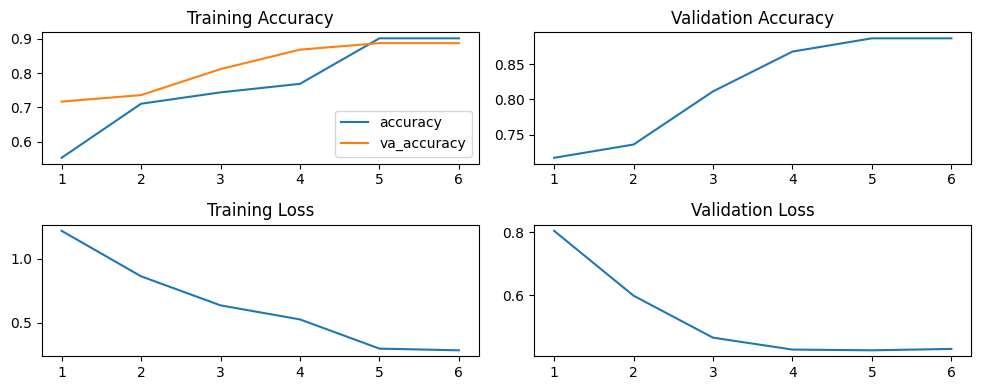

In [55]:
model = Sequential([
    Dense(16, activation='relu', kernel_initializer=GlorotUniform(seed = 36)),
    Dropout(0.2, seed = 36),
    Dense(1, activation = 'sigmoid', kernel_initializer=GlorotUniform(seed = 36))
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.000999),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs = 6
)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 4))
ax[0, 0].plot(range(1, len(accuracy)+1), accuracy, label = 'accuracy')
ax[0, 0].plot(range(1, len(val_accuracy)+1), val_accuracy, label = 'va_accuracy')
ax[0, 0].set_title('Training Accuracy')
ax[0, 1].plot(range(1, len(val_accuracy)+1), val_accuracy)
ax[0, 1].set_title('Validation Accuracy')

loss = history.history['loss']
val_loss = history.history['val_loss']

ax[1, 0].plot(range(1, len(loss)+1), loss)
ax[1, 0].set_title('Training Loss')
ax[1, 1].plot(range(1, len(val_loss)+1), val_loss)
ax[1, 1].set_title('Validation Loss')

ax[0, 0].legend()
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

- extra trees classifier gave the best raw performace so let's perform some hyperparamter tuning on this model

**base model**

In [58]:
xtree = ExtraTreesClassifier(random_state=36).fit(x_train, y_train)
predictions = xtree.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8867924528301887
[[21  4]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.87      0.93      0.90        28

    accuracy                           0.89        53
   macro avg       0.89      0.88      0.89        53
weighted avg       0.89      0.89      0.89        53



**with warm start**

In [57]:
xtree = ExtraTreesClassifier(warm_start = True, random_state=36).fit(x_train, y_train)
predictions = xtree.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8867924528301887
[[21  4]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.87      0.93      0.90        28

    accuracy                           0.89        53
   macro avg       0.89      0.88      0.89        53
weighted avg       0.89      0.89      0.89        53



**with bootstrap**

In [59]:
xtree = ExtraTreesClassifier(bootstrap = True, random_state=36).fit(x_train, y_train)
predictions = xtree.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8679245283018868
[[20  5]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.84      0.93      0.88        28

    accuracy                           0.87        53
   macro avg       0.87      0.86      0.87        53
weighted avg       0.87      0.87      0.87        53



**number of estimators**

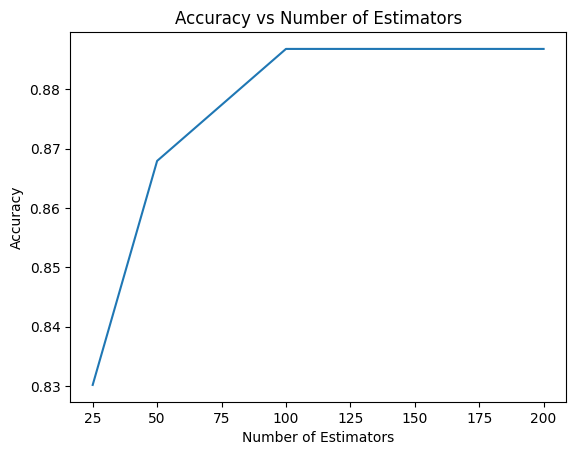

In [73]:
values = [25, 50, 100, 150, 200]
result = {}
for value in values:
    xtree = ExtraTreesClassifier(n_estimators = value, random_state=36).fit(x_train, y_train)
    predictions = xtree.predict(x_test)
    result[value] = accuracy_score(y_test, predictions)

plt.plot(values, list(result.values()))
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

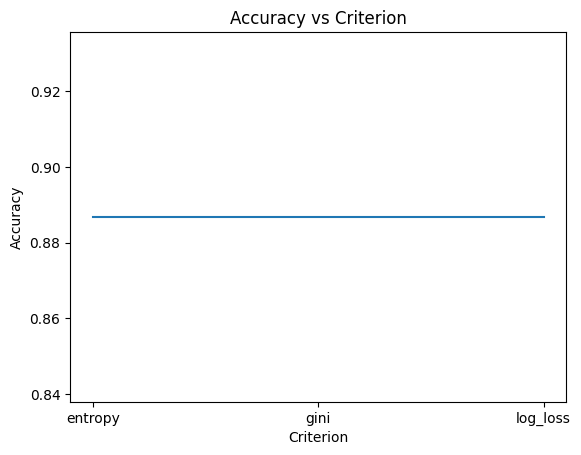

In [77]:
values = ['entropy', 'gini', 'log_loss']
result = {}
for value in values:
    xtree = ExtraTreesClassifier(criterion = value, random_state=36).fit(x_train, y_train)
    predictions = xtree.predict(x_test)
    result[value] = accuracy_score(y_test, predictions)

plt.plot(values, list(result.values()))
plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Criterion')
plt.show()

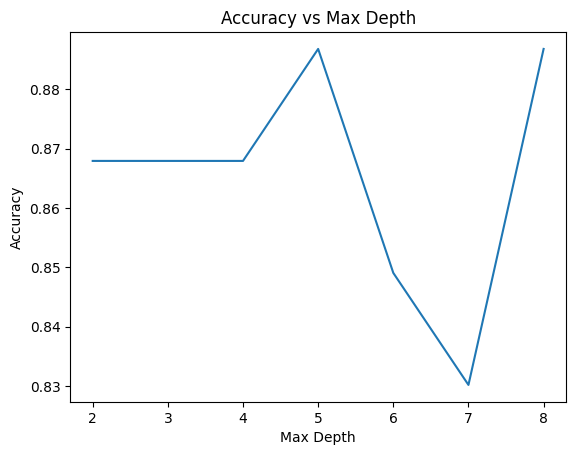

In [78]:
values = [2, 3, 4, 5, 6, 7, 8]
result = {}
for value in values:
    xtree = ExtraTreesClassifier(max_depth = value, random_state=36).fit(x_train, y_train)
    predictions = xtree.predict(x_test)
    result[value] = accuracy_score(y_test, predictions)

plt.plot(values, list(result.values()))
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()

- Nothing seems to improve the model the base model is already very precise
- Let us now try to tune the custom neural network

**Neural Network Tuning**

*Base Model*

Epoch 1/6
4/4 [==============================] - 1s 61ms/step - loss: 1.2482 - accuracy: 0.5620 - val_loss: 0.7200 - val_accuracy: 0.7358
Epoch 2/6
4/4 [==============================] - 0s 15ms/step - loss: 0.8457 - accuracy: 0.6529 - val_loss: 0.5062 - val_accuracy: 0.7736
Epoch 3/6
4/4 [==============================] - 0s 14ms/step - loss: 0.5398 - accuracy: 0.7438 - val_loss: 0.4115 - val_accuracy: 0.8491
Epoch 4/6
4/4 [==============================] - 0s 15ms/step - loss: 0.5300 - accuracy: 0.7934 - val_loss: 0.3912 - val_accuracy: 0.8679
Epoch 5/6
4/4 [==============================] - 0s 14ms/step - loss: 0.4356 - accuracy: 0.8347 - val_loss: 0.4010 - val_accuracy: 0.8868
Epoch 6/6
4/4 [==============================] - 0s 14ms/step - loss: 0.2868 - accuracy: 0.8843 - val_loss: 0.4142 - val_accuracy: 0.8679


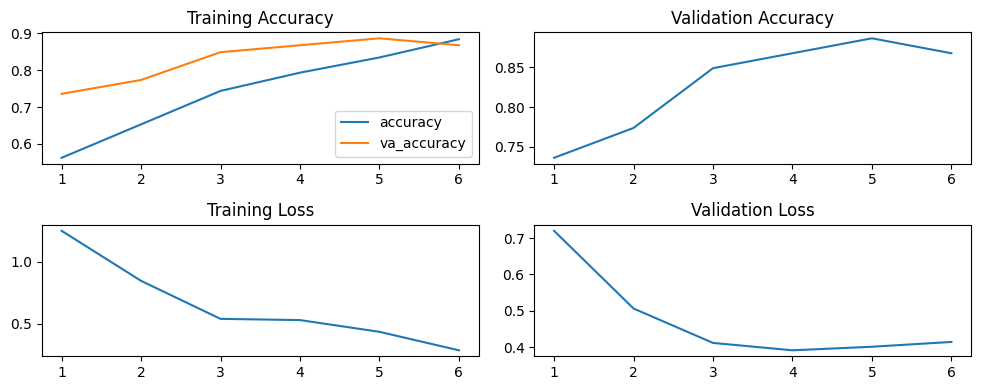

In [79]:
model = Sequential([
    Dense(16, activation='relu', kernel_initializer=GlorotUniform(seed = 36)),
    Dropout(0.2, seed = 36),
    Dense(1, activation = 'sigmoid', kernel_initializer=GlorotUniform(seed = 36))
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.000999),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs = 6
)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 4))
ax[0, 0].plot(range(1, len(accuracy)+1), accuracy, label = 'accuracy')
ax[0, 0].plot(range(1, len(val_accuracy)+1), val_accuracy, label = 'va_accuracy')
ax[0, 0].set_title('Training Accuracy')
ax[0, 1].plot(range(1, len(val_accuracy)+1), val_accuracy)
ax[0, 1].set_title('Validation Accuracy')

loss = history.history['loss']
val_loss = history.history['val_loss']

ax[1, 0].plot(range(1, len(loss)+1), loss)
ax[1, 0].set_title('Training Loss')
ax[1, 1].plot(range(1, len(val_loss)+1), val_loss)
ax[1, 1].set_title('Validation Loss')

ax[0, 0].legend()
plt.tight_layout()
plt.show()

*Increasing Layers**

Epoch 1/6
4/4 [==============================] - 1s 63ms/step - loss: 1.3008 - accuracy: 0.5041 - val_loss: 1.3840 - val_accuracy: 0.5283
Epoch 2/6
4/4 [==============================] - 0s 15ms/step - loss: 1.1120 - accuracy: 0.5207 - val_loss: 1.2028 - val_accuracy: 0.5283
Epoch 3/6
4/4 [==============================] - 0s 14ms/step - loss: 0.9843 - accuracy: 0.5289 - val_loss: 1.0423 - val_accuracy: 0.5660
Epoch 4/6
4/4 [==============================] - 0s 14ms/step - loss: 1.0354 - accuracy: 0.5124 - val_loss: 0.8788 - val_accuracy: 0.5660
Epoch 5/6
4/4 [==============================] - 0s 14ms/step - loss: 0.7147 - accuracy: 0.5537 - val_loss: 0.7569 - val_accuracy: 0.6226
Epoch 6/6
4/4 [==============================] - 0s 14ms/step - loss: 0.8783 - accuracy: 0.5289 - val_loss: 0.6457 - val_accuracy: 0.6226


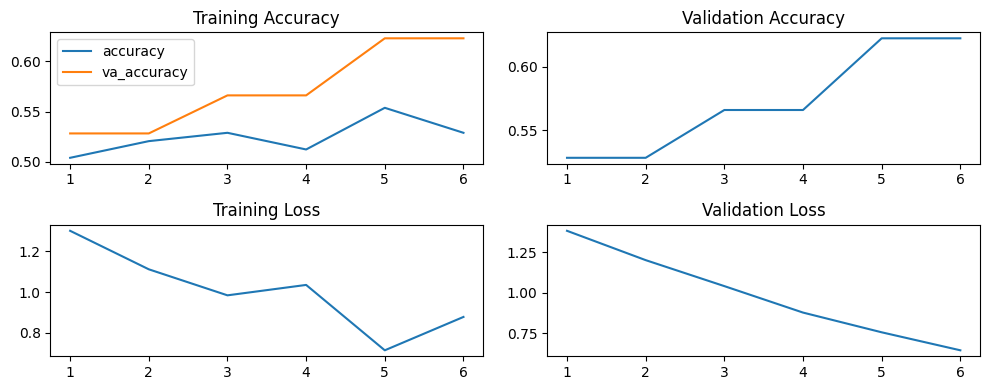

In [80]:
model = Sequential([
    Dense(16, activation='relu', kernel_initializer=GlorotUniform(seed = 36)),
    Dropout(0.2, seed = 36),
    Dense(16, activation='relu', kernel_initializer=GlorotUniform(seed = 36)),
    Dropout(0.2, seed = 36),
    Dense(8, activation='relu', kernel_initializer=GlorotUniform(seed = 36)),
    Dropout(0.2, seed = 36),
    Dense(1, activation = 'sigmoid', kernel_initializer=GlorotUniform(seed = 36))
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.000999),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs = 6
)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 4))
ax[0, 0].plot(range(1, len(accuracy)+1), accuracy, label = 'accuracy')
ax[0, 0].plot(range(1, len(val_accuracy)+1), val_accuracy, label = 'va_accuracy')
ax[0, 0].set_title('Training Accuracy')
ax[0, 1].plot(range(1, len(val_accuracy)+1), val_accuracy)
ax[0, 1].set_title('Validation Accuracy')

loss = history.history['loss']
val_loss = history.history['val_loss']

ax[1, 0].plot(range(1, len(loss)+1), loss)
ax[1, 0].set_title('Training Loss')
ax[1, 1].plot(range(1, len(val_loss)+1), val_loss)
ax[1, 1].set_title('Validation Loss')

ax[0, 0].legend()
plt.tight_layout()
plt.show()

*Increasing Neurons**

Epoch 1/6
4/4 [==============================] - 1s 63ms/step - loss: 1.0022 - accuracy: 0.6612 - val_loss: 0.5936 - val_accuracy: 0.6981
Epoch 2/6
4/4 [==============================] - 0s 16ms/step - loss: 0.4857 - accuracy: 0.8182 - val_loss: 0.5560 - val_accuracy: 0.8113
Epoch 3/6
4/4 [==============================] - 0s 16ms/step - loss: 0.2909 - accuracy: 0.9091 - val_loss: 0.6103 - val_accuracy: 0.8113
Epoch 4/6
4/4 [==============================] - 0s 16ms/step - loss: 0.3074 - accuracy: 0.9339 - val_loss: 0.6620 - val_accuracy: 0.8302
Epoch 5/6
4/4 [==============================] - 0s 16ms/step - loss: 0.1876 - accuracy: 0.9339 - val_loss: 0.6864 - val_accuracy: 0.8302
Epoch 6/6
4/4 [==============================] - 0s 16ms/step - loss: 0.0922 - accuracy: 0.9587 - val_loss: 0.6986 - val_accuracy: 0.8302


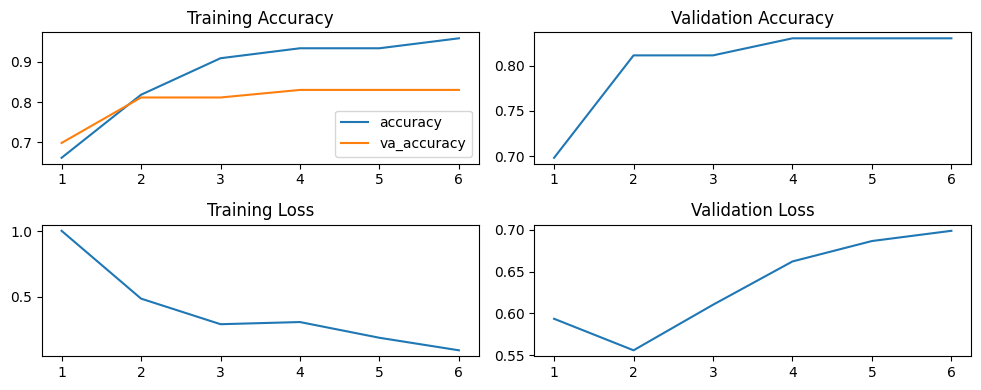

In [81]:
model = Sequential([
    Dense(128, activation='relu', kernel_initializer=GlorotUniform(seed = 36)),
    Dropout(0.2, seed = 36),
    Dense(1, activation = 'sigmoid', kernel_initializer=GlorotUniform(seed = 36))
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.000999),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs = 6
)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 4))
ax[0, 0].plot(range(1, len(accuracy)+1), accuracy, label = 'accuracy')
ax[0, 0].plot(range(1, len(val_accuracy)+1), val_accuracy, label = 'va_accuracy')
ax[0, 0].set_title('Training Accuracy')
ax[0, 1].plot(range(1, len(val_accuracy)+1), val_accuracy)
ax[0, 1].set_title('Validation Accuracy')

loss = history.history['loss']
val_loss = history.history['val_loss']

ax[1, 0].plot(range(1, len(loss)+1), loss)
ax[1, 0].set_title('Training Loss')
ax[1, 1].plot(range(1, len(val_loss)+1), val_loss)
ax[1, 1].set_title('Validation Loss')

ax[0, 0].legend()
plt.tight_layout()
plt.show()